In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

82.24595588227936 138.9667075088231
64.40558390235319 -85.42085308074789
22.959265414112778 136.81060007732611
-10.837465071493625 75.20599012892686
-45.728496891913046 122.98399954149829
-45.71263115358041 148.70879894347365
59.91829130541112 -119.51324958257719
88.47507430121397 51.06600846073485
54.104074441319966 123.61434302160728
78.83673365080298 -7.946579300330768
67.79960901248865 92.9154600724508
72.61788523523981 -144.67975469174164
23.80845365300955 -132.29703463253173
-26.959664163406885 -16.37578333373017
72.16492861538967 36.728779621295274
74.65554718387654 -163.26247289395062
34.77537906541032 140.8258121048014
18.074090070571202 -14.444540709801828
86.09880220096662 170.29313015771464
-79.87704284745689 -31.909509641976797
11.320955762505093 62.39073754711973
-23.180901071895462 70.12925701960816
-11.57740079771051 88.63981706570621
-67.49317412730437 -33.682264655593684
60.45845576786638 86.2163392620842
48.616130008615386 -178.56871876256065
20.879803531666838 2.782

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d38196a199a8a0ee781a866d25d0ca4a


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | high level
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | takhtamygda
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | svetlogorsk
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | podor
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | gr

Processing Record 35 of Set 4 | vardo
Processing Record 36 of Set 4 | tyukhtet
Processing Record 37 of Set 4 | sibi
Processing Record 38 of Set 4 | ningxiang
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | quixeramobim
Processing Record 42 of Set 4 | noyabrsk
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | bandundu
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | new norfolk
Processing Record 50 of Set 4 | kattivakkam
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | turbat
Processing Record 3 of Set 5 | grand island
Processing Record 4 of Set 5 | kegayli
City not found. Skipping...
Processing Record 5 of Set 5 | sabang
Processing Record 6 of Set 5 | tapaua
City not found. Skipping...
Processing Record 7 of Set 5 | poum
Pr

Processing Record 25 of Set 8 | borovoy
Processing Record 26 of Set 8 | tutoia
Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | sar-e pul
Processing Record 29 of Set 8 | kurlovo
Processing Record 30 of Set 8 | fredericton
Processing Record 31 of Set 8 | ciparay
Processing Record 32 of Set 8 | brainerd
Processing Record 33 of Set 8 | kiama
Processing Record 34 of Set 8 | kendari
Processing Record 35 of Set 8 | whitianga
Processing Record 36 of Set 8 | moree
Processing Record 37 of Set 8 | tak
Processing Record 38 of Set 8 | muisne
Processing Record 39 of Set 8 | shu
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | angola
Processing Record 42 of Set 8 | dingle
Processing Record 43 of Set 8 | ulaangom
Processing Record 44 of Set 8 | prata
Processing Record 45 of Set 8 | kamenka
Processing Record 46 of Set 8 | linqing
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | sokoni
Processing Record 49 of Set 8 | hamil

Processing Record 16 of Set 12 | pavlogradka
Processing Record 17 of Set 12 | ewa beach
Processing Record 18 of Set 12 | jatara
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | senneterre
Processing Record 21 of Set 12 | warrensburg
Processing Record 22 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 23 of Set 12 | parry sound
Processing Record 24 of Set 12 | borogontsy
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | ambon
Processing Record 28 of Set 12 | lukulu
Processing Record 29 of Set 12 | ormara
Processing Record 30 of Set 12 | kangaba
Processing Record 31 of Set 12 | arys
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | kaseda
Processing Record 34 of Set 12 | cururupu
Processing Record 35 of Set 12 | urumqi
Processing Record 36 of Set 12 | luganville
Processing Record 37 of Set 12 | auki
Processing Record 38 of Set 12 | nish

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Naze,28.3667,129.4833,77.22,89,8,7.56,JP,2022-06-22 22:07:14
1,Hithadhoo,-0.6000,73.0833,83.62,70,78,9.13,MV,2022-06-22 22:07:15
2,Albany,42.6001,-73.9662,65.88,80,96,1.99,US,2022-06-22 22:07:15
3,Hobart,-42.8794,147.3294,54.27,78,75,4.61,AU,2022-06-22 22:07:15
4,High Level,58.5169,-117.1360,64.51,77,100,5.75,CA,2022-06-22 22:07:17
5,Takhtamygda,54.1000,123.5667,59.13,97,100,3.09,RU,2022-06-22 22:07:17
6,Husavik,66.0449,-17.3389,39.52,81,100,18.12,IS,2022-06-22 22:07:18
7,Svetlogorsk,52.6333,29.7333,57.15,84,99,10.60,BY,2022-06-22 22:07:19
8,Fairbanks,64.8378,-147.7164,75.60,40,40,8.05,US,2022-06-22 22:03:34
9,Lompoc,34.6391,-120.4579,74.84,74,0,16.11,US,2022-06-22 22:07:20


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

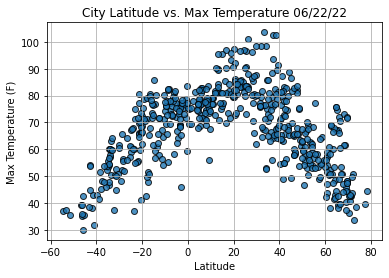

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

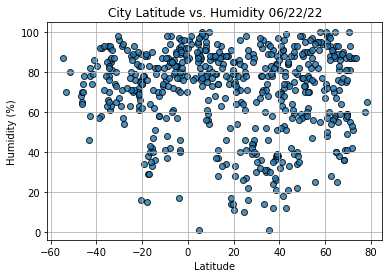

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

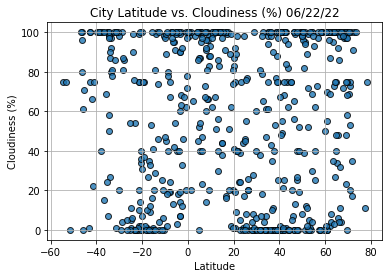

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

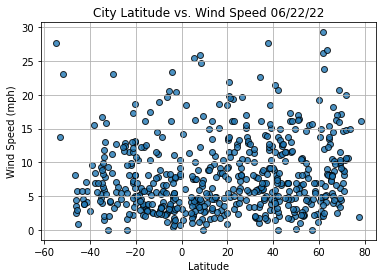

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Podor
Lat                       16.6527
Lng                      -14.9587
Max Temp                    96.85
Humidity                       34
Cloudiness                     17
Wind Speed                   9.15
Country                        MR
Date          2022-06-22 22:07:23
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Naze,28.3667,129.4833,77.22,89,8,7.56,JP,2022-06-22 22:07:14
2,Albany,42.6001,-73.9662,65.88,80,96,1.99,US,2022-06-22 22:07:15
4,High Level,58.5169,-117.1360,64.51,77,100,5.75,CA,2022-06-22 22:07:17
5,Takhtamygda,54.1000,123.5667,59.13,97,100,3.09,RU,2022-06-22 22:07:17
6,Husavik,66.0449,-17.3389,39.52,81,100,18.12,IS,2022-06-22 22:07:18


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

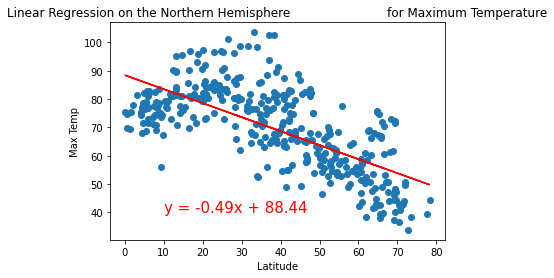

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

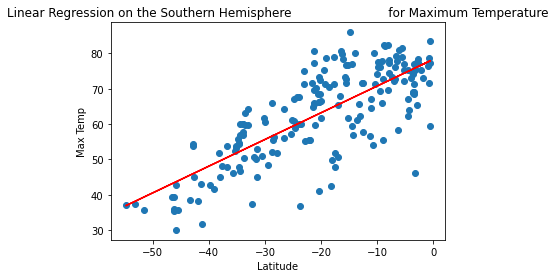

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

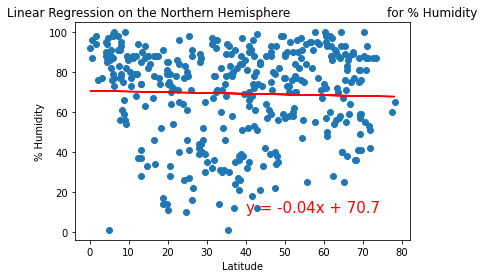

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

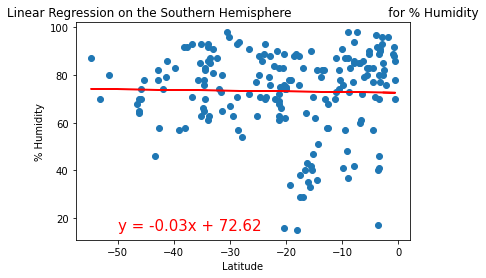

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

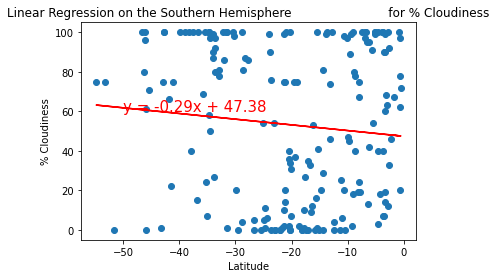

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

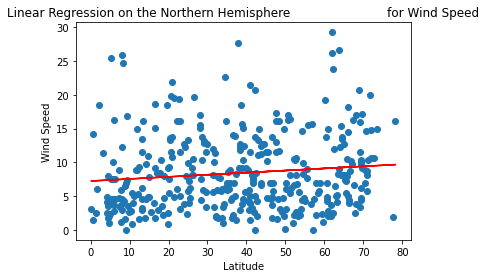

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

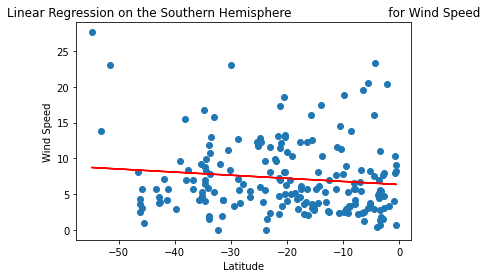

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))